In [1]:
!ls -lh /content

total 4.0K
drwxr-xr-x 1 root root 4.0K Nov  5 14:33 sample_data


In [2]:
!curl -L -o /content/emotion-detection-fer.zip\
  https://www.kaggle.com/api/v1/datasets/download/ananthu017/emotion-detection-fer

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 65.1M  100 65.1M    0     0  58.1M      0  0:00:01  0:00:01 --:--:--  117M


In [3]:
!unzip /content/emotion-detection-fer.zip -d /content/datasets

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/train/sad/im37.png  
  inflating: /content/datasets/train/sad/im370.png  
  inflating: /content/datasets/train/sad/im3700.png  
  inflating: /content/datasets/train/sad/im3701.png  
  inflating: /content/datasets/train/sad/im3702.png  
  inflating: /content/datasets/train/sad/im3703.png  
  inflating: /content/datasets/train/sad/im3704.png  
  inflating: /content/datasets/train/sad/im3705.png  
  inflating: /content/datasets/train/sad/im3706.png  
  inflating: /content/datasets/train/sad/im3707.png  
  inflating: /content/datasets/train/sad/im3708.png  
  inflating: /content/datasets/train/sad/im3709.png  
  inflating: /content/datasets/train/sad/im371.png  
  inflating: /content/datasets/train/sad/im3710.png  
  inflating: /content/datasets/train/sad/im3711.png  
  inflating: /content/datasets/train/sad/im3712.png  
  inflating: /content/datasets/train/sad/im3713.png  
  inflating: /content/datasets/trai

In [4]:
import cv2
from matplotlib import pyplot as plt
import keras
from keras.src.legacy.preprocessing.image import ImageDataGenerator

train_dir="datasets/train/"
test_dir="datasets/test/"

img=cv2.imread("datasets/train/happy/im0.png")
img_size=img.shape[0]
print(img_size)

48


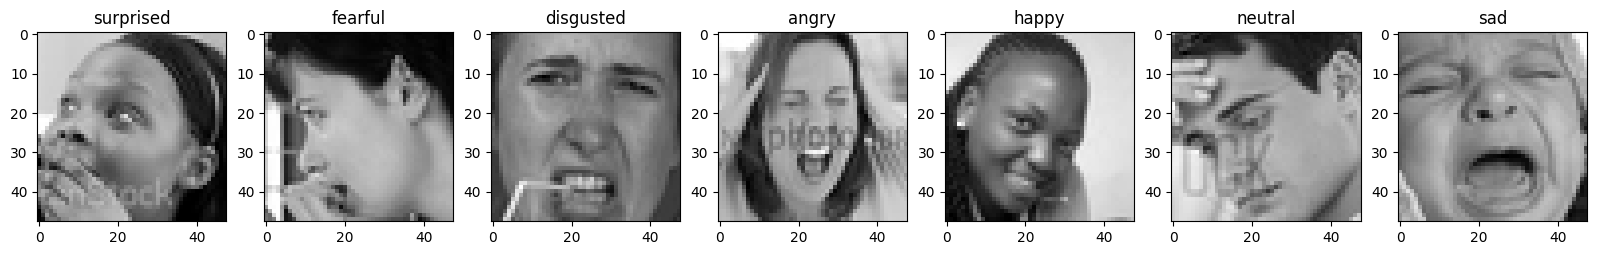

In [5]:
import matplotlib.pyplot as plt
import os

target_var = os.listdir(train_dir)
fig, axes = plt.subplots(1, len(target_var), figsize=(20,8))
for i in range(len(target_var)):
    d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    axes[i].imshow( plt.imread(d), cmap='gray')
    axes[i].set_title(target_var[i])
plt.show()

In [6]:
#vgg16 model
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
import numpy as np

#block n1
model=keras.Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding="same",activation="relu", input_shape=(img_size,img_size,1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))


#block n2
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(128,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n3
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(256,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n4
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#block n5
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(Conv2D(512,kernel_size=(3,3),padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.5))

#top
model.add(Flatten())
model.add(Dense(2048,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(target_var),activation="softmax"))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from keras.optimizers import Adam,RMSprop,SGD,Adamax

model.compile(
    optimizer = Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
  )

In [8]:
model.build()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 3, 3, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 10,437,767 (39.82 MB)

 Trainable params: 10,434,823 (39.81 MB)

 Non-trainable params: 2,944 (11.50 KB)

In [9]:
#data augmentation

train_datagen=ImageDataGenerator(rotation_range=180, #rotates the image with the amount of degrees we provide
                                         width_shift_range=0.1, #shifts the image randomly to the right or left along the width of the image
                                         height_shift_range=0.1, #shifts image randomly to up or below along the height of the image
                                         horizontal_flip=True, #flips the image horizontally
                                         rescale=1./255, #to scale down the pizel values in our image between 0 and 1
                                         zoom_range=0.2, #applies random zoom to our object
                                         validation_split=0.2 #reserves some images to be used for validation purpose
                                        )
validation_datagen=ImageDataGenerator(rescale=1./255,
                                         validation_split=0.2)

In [10]:
epochs = 200
batch_size = 64

In [11]:
#apply data augmentation

train_generator=train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (img_size,img_size),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )
validation_generator=validation_datagen.flow_from_directory( directory = test_dir,
                                                              target_size = (img_size,img_size),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 22968 images belonging to 7 classes.
Found 1432 images belonging to 7 classes.


In [12]:
import sys

import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [13]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
print(f"Tensor Flow Version: {tf.__version__}")

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Tensor Flow Version: 2.19.0
Num GPUs Available:  1


In [15]:
with tf.device('/gpu:1'):

    history = model.fit(x = train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 40s 112ms/step - accuracy: 0.2149 - loss: 2.2277 - val_accuracy: 0.2472 - val_loss: 1.8248
Epoch 2/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2445 - loss: 1.8154 - val_accuracy: 0.2486 - val_loss: 1.8097
Epoch 3/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2466 - loss: 1.8055 - val_accuracy: 0.2444 - val_loss: 1.7981
Epoch 4/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 63ms/step - accuracy: 0.2479 - loss: 1.7976 - val_accuracy: 0.2556 - val_loss: 1.7937
Epoch 5/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2521 - loss: 1.7987 - val_accuracy: 0.2423 - val_loss: 1.7836
Epoch 6/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 22s 62ms/step - accuracy: 0.2551 - loss: 1.7952 - val_accuracy: 0.2535 - val_loss: 1.8080
Epoch 7/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2590 - loss: 1.7837 - val_accuracy: 0.2689 - val_loss: 1.7681
Epoch 8/200
359/359 ━━━━━━━━━━━━━━━━━━━━ 23s 63ms/step - accuracy: 0.2539 - loss: 

In [16]:
model.save('model.h5')

(48, 48)


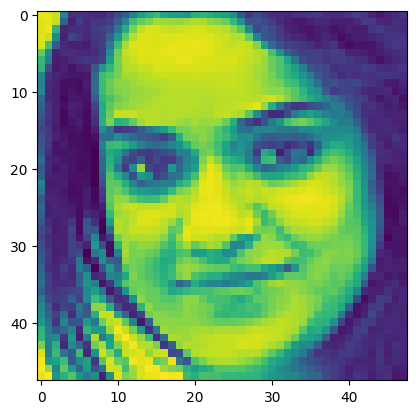

In [18]:
from keras.preprocessing import image

img = image.load_img("datasets/test/happy/im1.png",target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)
print(img.shape)

In [19]:
label_dict = {0:'Angry',1:'Disgust',2:'Fear',3:'Happy',4:'Neutral',5:'Sad',6:'Surprise'}

In [20]:
img = np.expand_dims(img,axis = 0) #makes image shape (1,48,48)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[np.float32(1.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0)]


In [21]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

359/359 ━━━━━━━━━━━━━━━━━━━━ 24s 67ms/step - accuracy: 0.6333 - loss: 0.9802
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5825 - loss: 1.1049
final train accuracy = 63.12 , validation accuracy = 59.50


In [22]:
model.save_weights('model.weights.h5')